In [14]:
import numpy as np
import pandas as pd
import datetime

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
weather = pd.read_csv("weather_NY_2010_2018Nov.csv")

In [3]:
station_table = weather.loc[:, ["StationName", "Latitude", "Longitude"]].groupby("StationName").mean()

In [4]:
station_index = np.load("../Documents/station_np/station_np.npy")

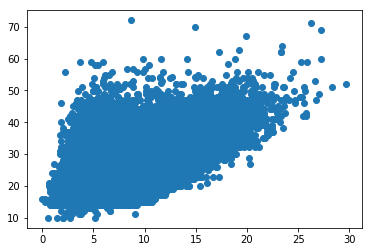

In [47]:
dd = weather.loc[:, ["WindSpeed", "Gust", "MaxSustainedWind"]][weather["Gust"].isnull() == False]
plt.scatter(dd["WindSpeed"], dd["Gust"])

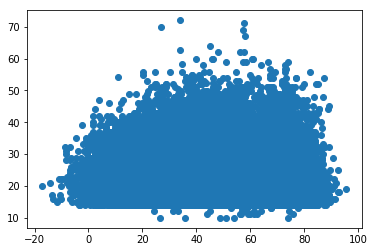

In [25]:
plt.scatter(dd["MeanTemp"], dd["Gust"])

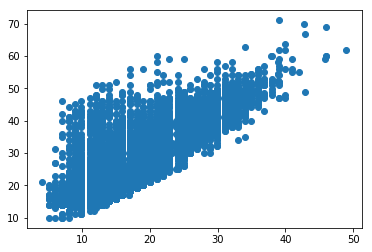

In [26]:
plt.scatter(dd["MaxSustainedWind"], dd["Gust"])

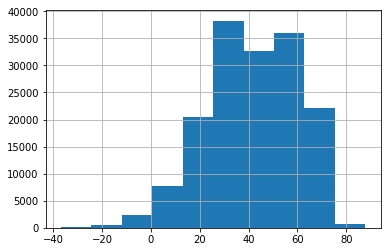

In [31]:
weather["MinTemp"].hist()

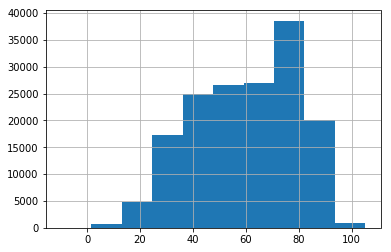

In [32]:
weather["MaxTemp"].hist()

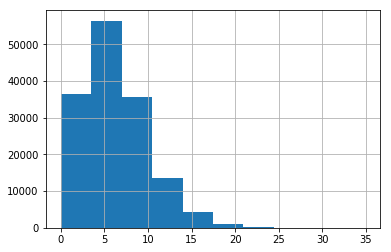

In [35]:
weather['WindSpeed'].hist()

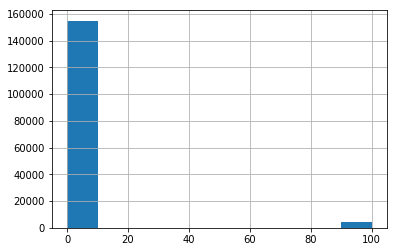

In [42]:
weather['Percipitation'].hist()

In [81]:
weather['Percipitation'].describe()

count    159156.000000
mean          2.804314
std          16.272008
min           0.000000
25%           0.000000
50%           0.000000
75%           0.030000
max          99.990000
Name: Percipitation, dtype: float64

In [27]:
weather.isnull().apply(sum)/weather.shape[0]

USAF                0.000000
WBAN                0.000000
StationName         0.000000
State               0.000000
Latitude            0.000000
Longitude           0.000000
MeanTemp            0.000000
MinTemp             0.000330
MaxTemp             0.000330
DewPoint            0.243483
Percipitation       0.010070
WindSpeed           0.083166
MaxSustainedWind    0.169181
Gust                0.522954
Rain                0.000000
SnowDepth           0.966749
SnowIce             0.000000
Year                0.000000
Month               0.000000
Day                 0.000000
dtype: float64

In [28]:
weather["SnowDepth"] = weather["SnowDepth"].fillna(0)

In [44]:
for name in ["MinTemp", "MaxTemp", "DewPoint"]:
    impute_value = weather[name].mean()
    weather[name] = weather[name].fillna(impute_value)

    
for name in ["WindSpeed", "MaxSustainedWind", "Percipitation"]:
    impute_value = weather[name].median()
    weather[name] = weather[name].fillna(impute_value)


In [41]:
impute_value = weather['WindSpeed'].median()
weather['WindSpeed'] = weather['WindSpeed'].fillna(impute_value)

impute_value = weather['MaxSustainedWind'].median()
weather['MaxSustainedWind'] = weather['MaxSustainedWind'].fillna(impute_value)


impute_value = weather['Percipitation'].median()
weather['Percipitation'] = weather['Percipitation'].fillna(impute_value)

In [83]:
weather.isnull().apply(sum)/weather.shape[0]

USAF                0.0
WBAN                0.0
StationName         0.0
State               0.0
Latitude            0.0
Longitude           0.0
MeanTemp            0.0
MinTemp             0.0
MaxTemp             0.0
DewPoint            0.0
Percipitation       0.0
WindSpeed           0.0
MaxSustainedWind    0.0
Gust                0.0
Rain                0.0
SnowDepth           0.0
SnowIce             0.0
Year                0.0
Month               0.0
Day                 0.0
dtype: float64

In [49]:
gust_not_null = weather.loc[:, ["WindSpeed", "Gust", "MaxSustainedWind"]][weather["Gust"].isnull() == False]
gust_null = weather.loc[:, ["WindSpeed", "Gust", "MaxSustainedWind"]][weather["Gust"].isnull() == True]

In [58]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit( gust_not_null.loc[:, ["WindSpeed", "MaxSustainedWind"]], gust_not_null.loc[:, "Gust"])

gust_impute = regr.predict(gust_null.loc[:, ["WindSpeed", "MaxSustainedWind"]])
gust_null.loc[:, "Gust"] = gust_impute

weather["Gust"] = pd.concat([gust_null.loc[:, "Gust"], gust_not_null.loc[:, "Gust"]]).sort_index()

weather["timestamp"] = weather["Month"].astype(str).apply(lambda x: x.zfill(2)) + "/" + weather["Day"].astype(str).apply(lambda x: x.zfill(2)) + "/" + weather["Year"].astype(str)

In [104]:
weather["timestamp"] = weather["Month"].astype(str).apply(lambda x: x.zfill(2)) + "/" + weather["Day"].astype(str).apply(lambda x: x.zfill(2)) + "/" + weather["Year"].astype(str)

In [106]:
weather.head()

,USAF,WBAN,StationName,State,Latitude,Longitude,MeanTemp,MinTemp,MaxTemp,DewPoint,...,WindSpeed,MaxSustainedWind,Gust,Rain,SnowDepth,SnowIce,Year,Month,Day,timestamp
0,726228,94740,ADIRONDACK REGIONAL ARPT,NY,44.385,-74.207,27.6,24.8,30.9,25.0,...,1.3,6.0,11.422678,0,0.0,1,2010,1,1,01/01/2010
1,726228,94740,ADIRONDACK REGIONAL ARPT,NY,44.385,-74.207,-3.2,-20.9,17.1,-9.6,...,3.3,9.9,16.173333,0,0.0,1,2010,1,10,01/10/2010
2,726228,94740,ADIRONDACK REGIONAL ARPT,NY,44.385,-74.207,20.9,17.1,24.1,15.1,...,6.8,12.0,19.000000,0,0.0,1,2010,1,11,01/11/2010
3,726228,94740,ADIRONDACK REGIONAL ARPT,NY,44.385,-74.207,13.8,5.0,19.9,8.5,...,4.4,8.0,15.900000,0,0.0,1,2010,1,12,01/12/2010
4,726228,94740,ADIRONDACK REGIONAL ARPT,NY,44.385,-74.207,6.3,-8.0,19.0,1.9,...,3.3,5.1,10.608935,0,0.0,1,2010,1,13,01/13/2010


In [107]:
weather.to_csv("cleaned_weather.csv")